# Содержание
    
[Описание проекта](#project)

1. [Загрузка данных и их подготовка к исследованию](#start)

2.  [Функции для расчёта и анализа LTV, ROI, удержания и конверсии.](#functions)

    2.1. [Функциия для создания профилей пользователей get_profiles().](#functions1)

    2.2. [Функциия для подсчёта Retention Rate get_retention().](#functions2)

    2.3. [Функциия для подсчёта конверсии get_conversion().](#functions3)
    
    2.4. [Функциия для подсчёта LTV get_ltv().](#functions4)
    
    2.5. [Функциия для сглаживания данных filter_data()](#functions5)
    
    2.6. [Функциия для построения графика Retention Rate plot_retention()](#functions6)
    
    2.7. [Функциия для построения графика конверсии plot_conversion()](#functions7)        
    
    2.8. [Функциия для визуализации LTV и ROI plot_ltv_roi()](#functions8)    
    
3. [Проверка статистических гипотез](#analysis)

    3.1. [Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.](#analysis1)
 
    3.2. [Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.](#analysis2)

    3.3. [Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.](#analysis3)

    3.4. [Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.](#analysis4)    

4. [Маркетинг](#marketing)

    4.1. [Посчитайте общую сумму расходов на маркетинг.](#marketing1)

    4.2. [Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.](#marketing2)
    
    4.3. [Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.](#marketing3)
    
    4.4. [Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.](#marketing4)

    
5. [Оцените окупаемость рекламы](#advertisement)

    5.1. [Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.](#advertisement1)

    5.2. [Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.](#advertisement2)
    
    5.3. [Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.](#advertisement3)
    
    5.4.[Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.](#advertisement4)
    
    5.5.[Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.](#advertisement5)

6. [Выводы и рекомендации по исследованию.](#rec)

    6.3. [Причины неэффективности привлечения пользователей.](#rec1)

    6.2. [Рекомендации для отдела маркетинга.](#rec2)
 

<a id="project"></a>
# Описание проекта

Маркетинговый аналитиз развлекательного приложения Procrastinate Pro+. 

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. 

Задача исследования — разобраться в причинах и помочь компании выйти в плюс.

**Цель исследования - изучить:**
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Описание данных**

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях (`'visits_info_short.csv'`),
- выгрузка их покупок за этот период (`'orders_info_short.csv'`),
- рекламные расходы (`'costs_info_short.csv'`).

Структура `'visits_info_short.csv'`:
- `'User Id'` — уникальный идентификатор пользователя,
- `'Region'` — страна пользователя,
- `'Device'` — тип устройства пользователя,
- `'Channel'` — идентификатор источника перехода,
- `'Session Start'` — дата и время начала сессии,
- `'Session End'` — дата и время окончания сессии.


Структура `'orders_info_short.csv'`:
- `'User Id'` — уникальный идентификатор пользователя,
- `'Event Dt'` — дата и время покупки,
- `'Revenue'` — сумма заказа.


Структура `'costs_info_short.csv'`:
- `'dt'` — дата проведения рекламной кампании,
- `'Channel'` — идентификатор рекламного источника,
- `'costs'` — расходы на эту кампанию.

Импорт необходимых для работы библиотек.

In [43]:
import pandas as pd
import matplotlib
import seaborn as sns
sns.set_theme(style='whitegrid')
sns.color_palette('tab20')

import matplotlib.pyplot as plt
#код, который выводит все колонки таблицы
pd.set_option('display.max_columns', None)  
#код отображает float с двумя знаками после точки
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

from datetime import datetime, timedelta

from IPython.display import display_html#библиотеки, использовались для вывода сразу нескольких доблиц в строке
from ipywidgets import widgets, Layout#

<a id="start"></a> 
### Загрузка данных и их подготовка к исследованию

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

Открытие файла с данными и изучение общей информации.

In [44]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

In [45]:
def information_df(metod): 
    print('Ознакомимся с таблицей, для этого выведем первые 5 строк на экран.')
    display(metod.head())
    print(' ')    
    print('Выведем основную информацию таблицы с помощью метода info().')
    print(' ') 
    display(metod.info())
    print ('Количество явных дубликатов  в таблице:', metod.duplicated().sum())
    print(' ')
    print('Количество пропущенных значений в таблице:')
    display(metod.isna().sum())

***Изучим данные таблицы `'visits'`.***

In [46]:
information_df(visits)

Ознакомимся с таблицей, для этого выведем первые 5 строк на экран.


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


 
Выведем основную информацию таблицы с помощью метода info().
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

Количество явных дубликатов  в таблице: 0
 
Количество пропущенных значений в таблице:


User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

Рассмотрев исходные данные, можно выделить следующее:

- в таблице 6 столбцов, в столбцах 'Session Start' и 'Session End' необходимо изменить тип данных;


- пропущенные значения и дубликаты отсутствуют;


- в названиях столбцов видны нарушения стиля (необходимо привести столбцы к "змеином_регистре").

***Изучим данные таблицы `'orders'`.***

In [47]:
information_df(orders)

Ознакомимся с таблицей, для этого выведем первые 5 строк на экран.


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


 
Выведем основную информацию таблицы с помощью метода info().
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

Количество явных дубликатов  в таблице: 0
 
Количество пропущенных значений в таблице:


User Id     0
Event Dt    0
Revenue     0
dtype: int64

Рассмотрев исходные данные, можно выделить следующее:

- в таблице 3 столбца, в столбце 'Event Dt' необходимо изменить тип данных;


- пропущенные значения и дубликаты отсутствуют;


- в названиях столбцов видны нарушения стиля (необходимо привести столбцы к "змеином_регистре").

***Изучим данные таблицы `'costs'`.***

In [48]:
information_df(costs)

Ознакомимся с таблицей, для этого выведем первые 5 строк на экран.


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80
3,2019-05-04,FaceBoom,136.40
4,2019-05-05,FaceBoom,122.10


 
Выведем основную информацию таблицы с помощью метода info().
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Количество явных дубликатов  в таблице: 0
 
Количество пропущенных значений в таблице:


dt         0
Channel    0
costs      0
dtype: int64

Рассмотрев исходные данные, можно выделить следующее:

- в таблице 3 столбца, в столбце 'dt' необходимо изменить тип данных;


- пропущенные значения и дубликаты отсутствуют;


- в названиях столбцов видны нарушения стиля (необходимо привести столбцы к "змеином_регистре").

***Переименуем названия столбцов в таблицах, приводя их к "змеиному_регистру"***

In [49]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
orders.columns = ['user_id', 'event_dt', 'revenue']
costs.columns = ['dt', 'channel', 'costs']

***Изменим типы данных.***

In [50]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [51]:
display(visits.dtypes)
display(orders.dtypes)
display(costs.dtypes)

user_id                   int64
region                   object
device                   object
channel                  object
session_start    datetime64[ns]
session_end      datetime64[ns]
dtype: object

user_id              int64
event_dt    datetime64[ns]
revenue            float64
dtype: object

dt          object
channel     object
costs      float64
dtype: object

***Проверим временной интервал таблицы visits с данными об посещениях пользователей на соответствие условию проекта***

In [52]:
visits_date = (visits.sort_values(by=['user_id', 'session_start']).groupby('user_id').agg({'session_start': 'first'}))
print('Временной интервал таблицы visits:', \
      visits_date['session_start'].min().strftime('%d/%m/%Y'), '-', \
      visits_date['session_start'].max().strftime('%d/%m/%Y'))

Временной интервал таблицы visits: 01/05/2019 - 27/10/2019


Временной интервал первых посещений пользователей соответствует указанному в ТЗ временному периоду ( с 1 мая по 27 октября 2019 года:)

***Проверим, есть ли в исходных данных строки с аномальными значениями.***

In [53]:
print('Строки таблицы visits с аномальными сессиями(окончание сессии было раньше):')
display(visits[visits['session_end'] < visits['session_start']])

print('Строки таблицы orders с отрицательной или нулевой суммой заказа:')
display(orders[orders['revenue'] <= 0])

print('Строки таблицы costs с отрицательной или нулевой суммой расходов на рекламну кампанию:')
costs[costs['costs'] <= 0]

Строки таблицы visits с аномальными сессиями(окончание сессии было раньше):


,user_id,region,device,channel,session_start,session_end


Строки таблицы orders с отрицательной или нулевой суммой заказа:


,user_id,event_dt,revenue


Строки таблицы costs с отрицательной или нулевой суммой расходов на рекламну кампанию:


,dt,channel,costs


Аномалии отсутствуют.

**Вывод по предобработке**

На данном этапе была завершена предобработка данных.

Откорректированы названия столбцов.

Изменены типы данных в столбцах.

<a id="functions"></a> 
### Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

<a id="functions1"></a> 
#### Функциия для создания профилей пользователей `get_profiles()`.

In [54]:
# функция для создания пользовательских профилей
def get_profiles(sessions, orders, ad_costs):
    
    # сортируем сессии по ID пользователя и дате посещения
    # группируем по ID и находим первые значения session_start и channel
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    
    # определяем дату первого посещения
    # и первый день месяца и неделю, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['week'] = profiles['first_ts'].astype('datetime64[W]')
    
    # добавляем признак платящих пользователей (проверка, есть ли ID пользователей из visits в orders)
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())# ваш код здесь
    
    
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    

    return profiles

<a id="functions2"></a> 
#### Функциия для подсчёта Retention Rate `get_retention()`.

In [55]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    ## добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

<a id="functions3"></a> 
#### Функциия для подсчёта конверсии `get_conversion()`.

In [56]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

<a id="functions4"></a> 
#### Функциия для подсчёта LTV `get_ltv()`.

In [57]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

<a id="functions5"></a> 
#### Функциия для сглаживания данных `filter_data()`

In [58]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

<a id="functions6"></a> 
#### Функциия для построения графика Retention Rate `plot_retention()`

In [59]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

<a id="functions7"></a> 
#### Функциия для построения графика конверсии `plot_conversion()`

In [60]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

<a id="functions8"></a> 
#### Функциия  для визуализации LTV и ROI `plot_ltv_roi()`

In [61]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

**Необходимые для расчёта и анализа LTV, ROI, удержания и конверсии функции,  а также функции для их визуализации заданы.**

<a id="analysis"></a> 
### Исследовательский анализ данных


- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

<a id="analysis1"></a> 
#### Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

In [62]:
profiles = get_profiles(visits, orders, costs)

profiles

,user_id,first_ts,channel,device,region,dt,month,week,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,2019-05-02,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,2019-07-04,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,2019-09-26,False,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,2019-08-22,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,2019-09-26,False,0.23
...,...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,2019-09-26,False,3.50
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,2019-10-17,False,0.00
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,2019-07-18,False,2.60
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,2019-09-26,False,0.21


In [63]:

min_analysis_date = profiles['dt'].min()
max_analysis_date =  profiles['dt'].max()
print('Минимальная дата привлечения пользователей:', min_analysis_date)

print('Максимальная дата привлечения пользователей:', max_analysis_date)

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


При использовании функции get_profiles(), передав ей данные таблиц о посещениях(visits), покупках(orders) и тратах на рекламу(costs) были получены профили пользователей(уникальных user_id) в количестве 150008.

Определены: минимальная дата привлечения пользователей - 2019-05-01, максимальная дата привлечения пользователей -  2019-10-27

Даты соответствуют (в ТЗ указана информация о данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года)

<a id="analysis2"></a> 
#### Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [64]:
region_profiles = profiles.groupby('region').agg(users = ('user_id','nunique'), \
                                payer_users = ('payer', 'sum'), \
                                share_of_paying_users = ('payer', 'mean'))\
.sort_values(by='share_of_paying_users', ascending=False)
region_profiles['share_of_paying_users'] = region_profiles['share_of_paying_users'].apply('{:.2%}'.format)
region_profiles

,users,payer_users,share_of_paying_users
region,,,
United States,100002,6902,6.90%
Germany,14981,616,4.11%
UK,17575,700,3.98%
France,17450,663,3.80%


Сгруппировав таблицу, отражающую количество пользователей и долю платящих из ***каждой страны***, можно отметить, что наибольшее количество пользователей приходится на Соединенные Штаты(100002 пользователя), у остальных трех стран их количество в 5-6 раз меньше. Рассматривая объем платящих пользователей, лидерство также у Соединенные Штаты(6,9%), далее Германия (4,11%), Великобритания(3,98%), Франция(3,8%). 

<a id="analysis3"></a> 
#### Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [65]:
device_profiles = profiles.groupby('device').agg(users = ('user_id','nunique'), \
                                payer_users = ('payer', 'sum'), \
                                share_of_paying_users = ('payer', 'mean'))\
.sort_values(by='share_of_paying_users', ascending=False)
device_profiles['share_of_paying_users'] = device_profiles['share_of_paying_users'].apply('{:.2%}'.format)
device_profiles

,users,payer_users,share_of_paying_users
device,,,
Mac,30042,1912,6.36%
iPhone,54479,3382,6.21%
Android,35032,2050,5.85%
PC,30455,1537,5.05%


Сгруппировав таблицу, отражающую количество пользователей и долю платящих для ***каждого устройства***, можно отметить, что, в в отличие от группировки по стране, распределение по устройствам более равномерное. Самыми многочисленными можно назвать пользователей с устройствами iPhone(54479 пользователей). Пользователи с устройствами Android на втором месте(	35032 пользователя), а на устройствах PC и Mac количество практически одинаковое (30455 и 30042 пользователя, соответственно). Касательно объема платящих пользователей по данным устройствам, здесь лидерство у владельцев Mac(6,21%), незначительно ниже процент платящих пользователей и у владельцев iPhone(6,21%). Доля платящих пользователей у владельцев Android 5,85%, а у PC - 5,05%.

<a id="analysis4"></a> 
#### Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [66]:
channel_profiles = profiles.groupby('channel').agg(users = ('user_id','nunique'), \
                                payer_users = ('payer', 'sum'), \
                                share_of_paying_users = ('payer', 'mean'))\
.sort_values(by='share_of_paying_users', ascending=False)
channel_profiles['share_of_paying_users'] = channel_profiles['share_of_paying_users'].apply('{:.2%}'.format)
channel_profiles

,users,payer_users,share_of_paying_users
channel,,,
FaceBoom,29144,3557,12.20%
AdNonSense,3880,440,11.34%
lambdaMediaAds,2149,225,10.47%
TipTop,19561,1878,9.60%
RocketSuperAds,4448,352,7.91%
WahooNetBanner,8553,453,5.30%
YRabbit,4312,165,3.83%
MediaTornado,4364,156,3.57%
LeapBob,8553,262,3.06%


Сгруппировав таблицу, отражающую количество пользователей и долю платящих ***для каждого канала привлечения***, можно отметить, что наиболее многочисленным по привлечению пользователей, среди рекламных каналов, являются FaceBoom(29144 пользователя) и TipTop(19561 пользователь). Количество пользователей, привлеченных при помощи остальных рекламных каналов, варьируется от 2149 до 8605 пользователей. Лидерство по объему платящих пользователей у самого многочисленного канала FaceBoom(12,2%), также в тройку лидеров вошли AdNonSense(11,34%) и lambdaMediaAds(10,47%). А наименьшая доля платящих пользователей у рекламного канала OppleCreativeMedia(2,71%).

**Рассматривая количество т объем платящих пользователей по различным признакам было выявлено следующее:**

- наибольшее количество пользователей приходится на Соединенные Штаты(100002 пользователя), лидерство по объему платящих пользователей, также, у Соединенных Штатов(6,9%).


- самыми многочисленными можно назвать пользователей с устройствами iPhone(54479 пользователей), лидерами по объему платящих пользователей можно выделить владельцев Mac(6,21%) и iPhone(6,21%).


- наиболее многочисленным по привлечению пользователей, среди рекламных каналов, являются FaceBoom(29144 пользователя) и TipTop(19561 пользователь), в тройку лидеров по объему платящих пользователей среди рекламных каналов вошли: FaceBoom(12,2%), AdNonSense(11,34%) и lambdaMediaAds(10,47%). А наименьшая доля платящих пользователей у рекламного канала OppleCreativeMedia(2,71%).

<a id="marketing"></a> 
### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

<a id="marketing1"></a> 
#### Посчитайте общую сумму расходов на маркетинг.

In [67]:
round(costs['costs'].sum())

105497

Общая сумма расходов на маркетинг составила 105497 у.е.

<a id="marketing2"></a> 
#### Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [68]:
profiles.groupby('channel').agg({'acquisition_cost': 'sum'}).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Исходя из данных полученной таблицы, можно сказать, что на рекламные источники TipTop и FaceBoom было потрачено больше всего бюджета - 54751,3 и 32445,6 у.е., соответственно. Траты на рекламу для остальных каналов в разы меньше, и варьируются от 944,22 до 5151 у.е.

<a id="marketing3"></a> 
#### Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.

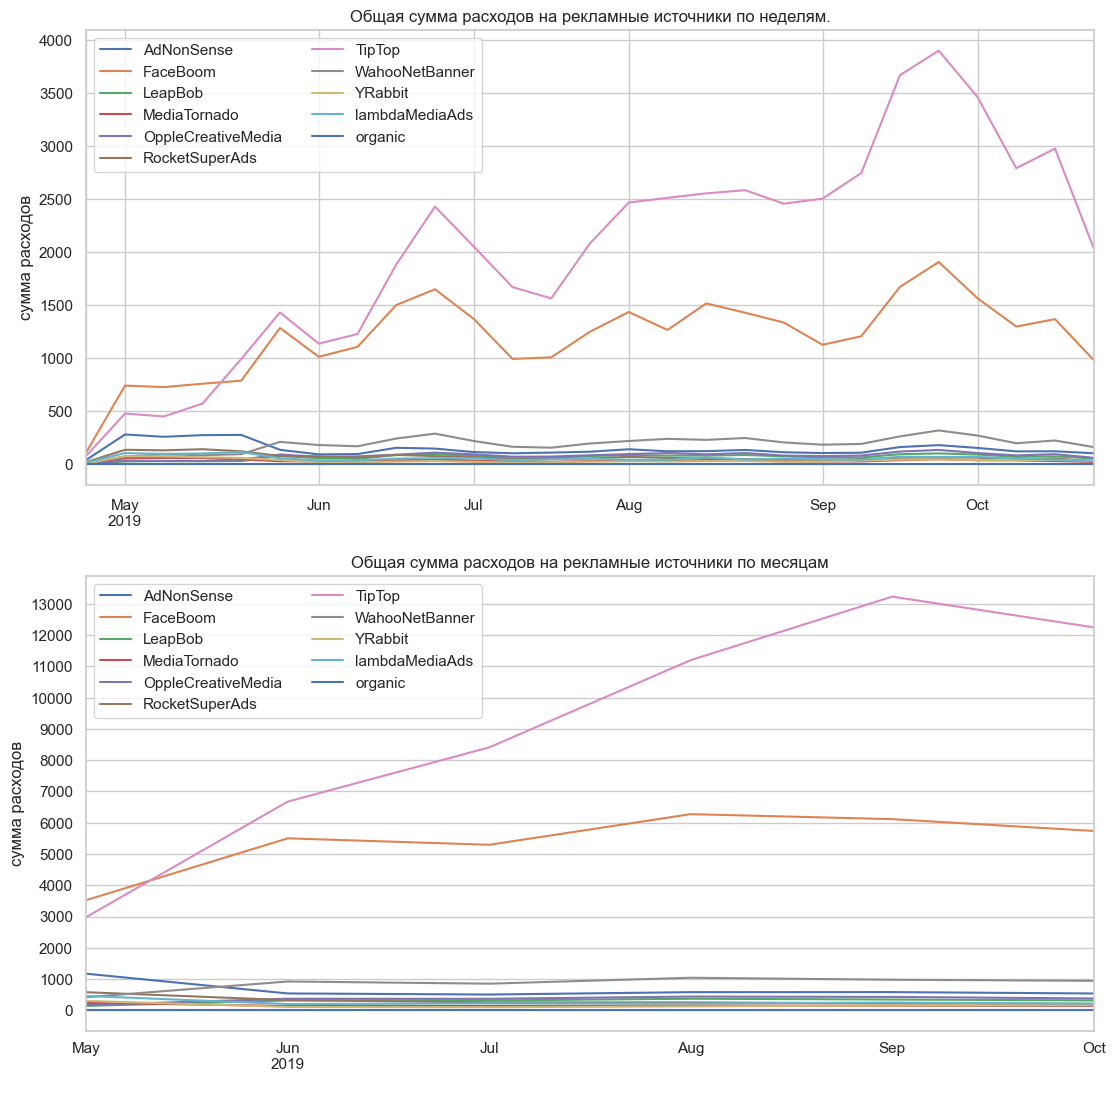

In [69]:
plt.figure(figsize=(13, 13))

profiles.pivot_table(index='channel', columns='week', values='acquisition_cost', aggfunc='sum').T.plot(ax=plt.subplot(2, 1, 1))
plt.title(r'Общая сумма расходов на рекламные источники по неделям.')
plt.xlabel(' ')
plt.ylabel(r'сумма расходов')
plt.legend(ncol=2, loc='upper left')
plt.yticks(np.arange(0,4500,500));

profiles.pivot_table(index='channel', columns='month', values='acquisition_cost', aggfunc='sum').T.plot(ax=plt.subplot(2, 1, 2))
plt.title(r'Общая сумма расходов на рекламные источники по месяцам')
plt.xlabel(' ')
plt.ylabel(r'сумма расходов')
plt.legend(ncol=2, loc='upper left')
plt.yticks(np.arange(0,14000,1000));

plt.show()

Построив диаграммы по динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику, можно заметить, что, с начала рассматриваемого периода, рекламные каналы TipTop и FaceBoom являются самыми дорогостоящими. В динамике рекламные затраты по ним только растут, когда по остальным каналам динамика достаточно стабильная, также рекламный бюджет между ними распределяется в равном количестве.

<a id="marketing4"></a> 
#### Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [70]:
mean_CAC = profiles.groupby('channel').agg(mean_CAC = ('acquisition_cost', 'mean'))

mean_CAC = channel_profiles.merge(
        mean_CAC,
        on=['channel'],
        how='left',
)
mean_CAC.sort_values(by = 'mean_CAC', ascending = False)

,users,payer_users,share_of_paying_users,mean_CAC
channel,,,,
TipTop,19561,1878,9.60%,2.80
FaceBoom,29144,3557,12.20%,1.11
AdNonSense,3880,440,11.34%,1.01
lambdaMediaAds,2149,225,10.47%,0.72
WahooNetBanner,8553,453,5.30%,0.60
RocketSuperAds,4448,352,7.91%,0.41
OppleCreativeMedia,8605,233,2.71%,0.25
YRabbit,4312,165,3.83%,0.22
MediaTornado,4364,156,3.57%,0.22


Максимальная средняя стоимость привлечения одного пользователя (CAC) наблюдается у источника TipTop(2,8 у.е.). Несмотря на то, что источник FaceBoom является вторым по объему затрат на рекламу, а также одним из самых дорогостоящих рекламных каналов, средняя стоимость привлечения одного пользователя в 2,5 раза ниже, чем у TipTop и составляет 1,11 у.е. CAC канала AdNonSense немногим меньше, чем у FaceBoom - 1,01 у.е.

In [71]:
print('Cредний САС по проекту:', round(profiles.loc[profiles['channel'] != "organic", 'acquisition_cost'].mean(),2))

Cредний САС по проекту: 1.13


**Рассмотрев распределение затрат по рекламным источникам, динамику изменения расходов во времени (по неделям и месяцам), а также среднюю стоимость привлечения одного пользователя было выявлено, что:**

- наибольший объем затрат на рекламу у каналов TipTop и FaceBoom, расходы составили - 54751,3 и 32445,6 у.е., соответственно,

-  в динамике рекламные затраты по каналам TipTop и FaceBoom только растут, когда по остальным каналам динамика достаточно стабильная,

- Максимальная средняя стоимость привлечения одного пользователя (CAC) наблюдается у источника TipTop(2,8 у.е.), также в тройке лидеров FaceBoom(1,11 у.е.), а также AdNonSense(1,01 у.е.).

<a id="advertisement"></a> 
### Оцените окупаемость рекламы


Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

<a id="advertisement1"></a>
#### Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [72]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

In [73]:
profiles = profiles.query('channel != "organic"')

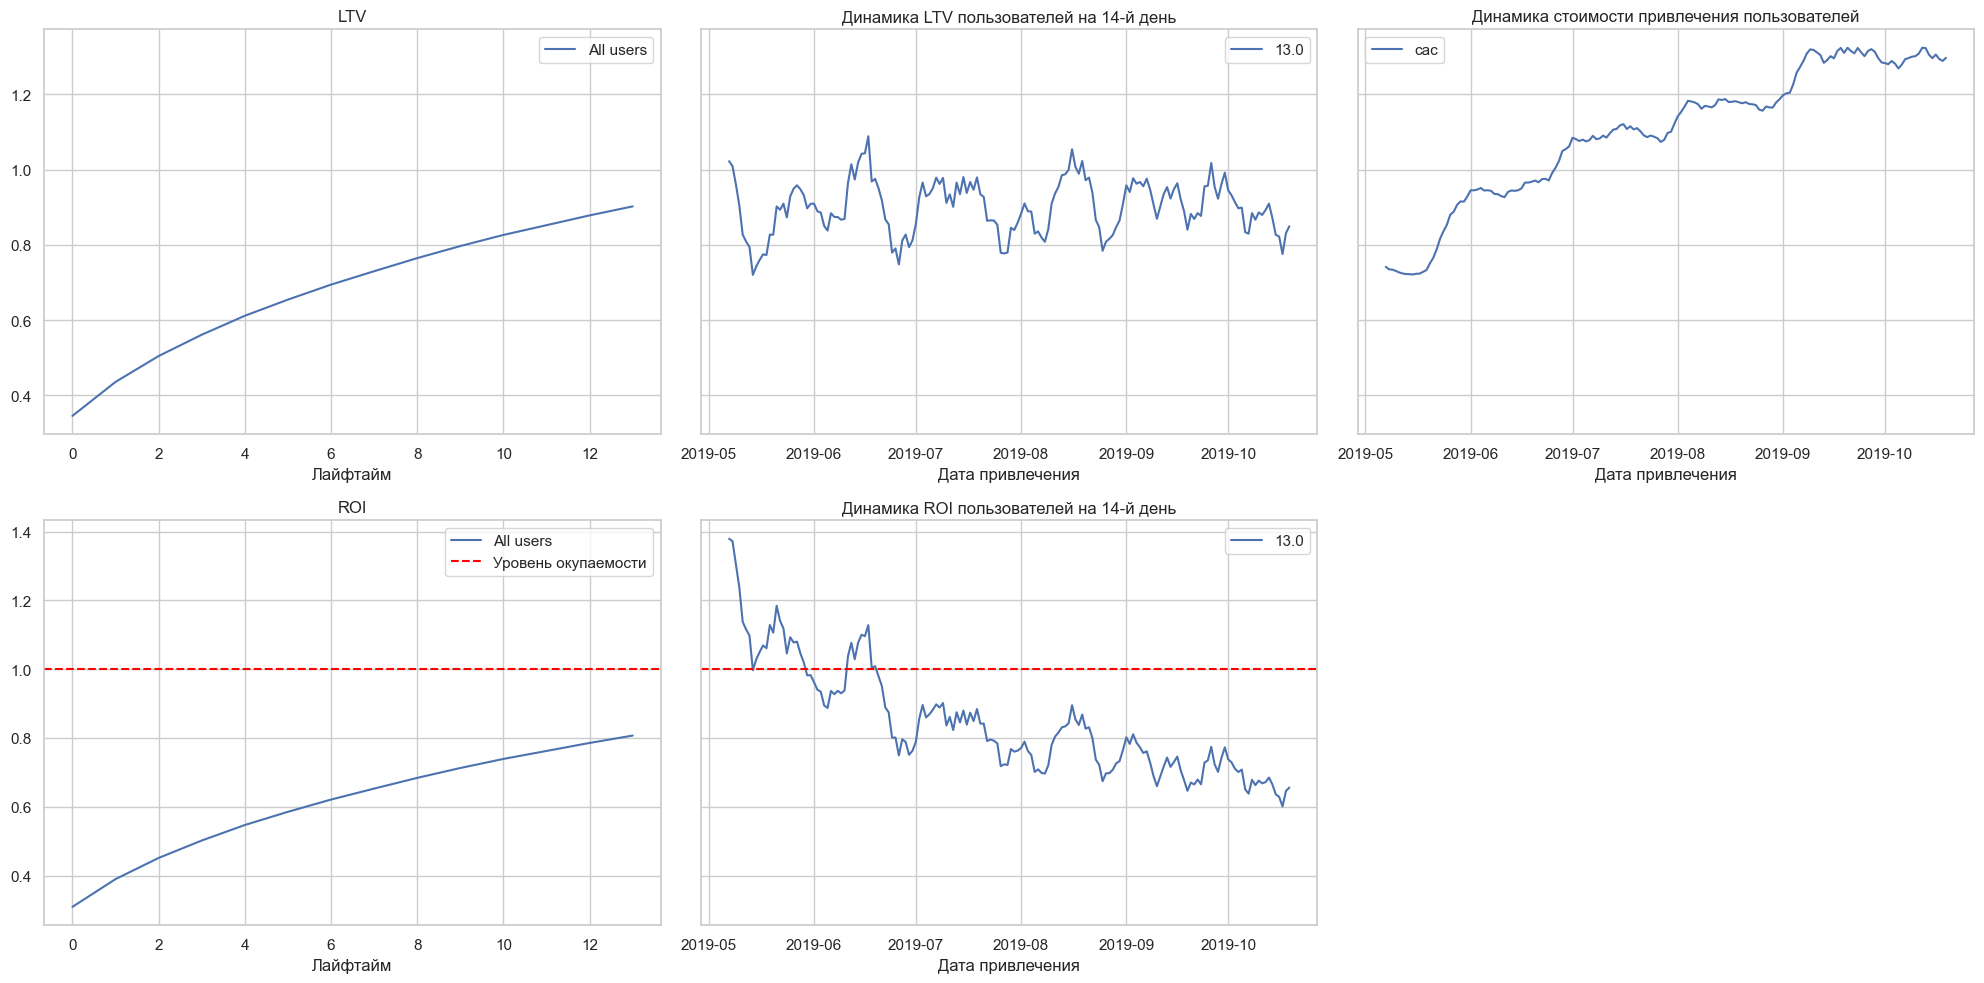

In [74]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Рассмотрев показатели по окупаемости рекламы на графиках можно сделать такие выводы:

- Реклама не окупается. ROI в конце второй недели составляет 80%. Однако в динамике заметно, что показатель к концу второй недели значительно упал за рассматриваемый период, а реклама перестала окупаться приблизительно с июня 2019 года. 

- CAC в динамике рассматриваемого периода постоянно увеличивается.

- Показатель LTV внутри рассматриваемого периода скачкообразно стабилен, в определенные периоды происходит увеличение, а затем снижение.

Таким образом, чтобы разобраться в причинах неэффективности, необходимо пройти по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

<a id="advertisement2"></a>
#### Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

Посчитаем и визуализируем конверсию, а также удержание пользователей по всем доступным характеристикам пользователей. Вызвав функции get_conversion(), plot_conversion(), get_retention() и plot_retention().

Для начала посчитаем и визуализируем конверсию пользователей в зависимости от устройства.

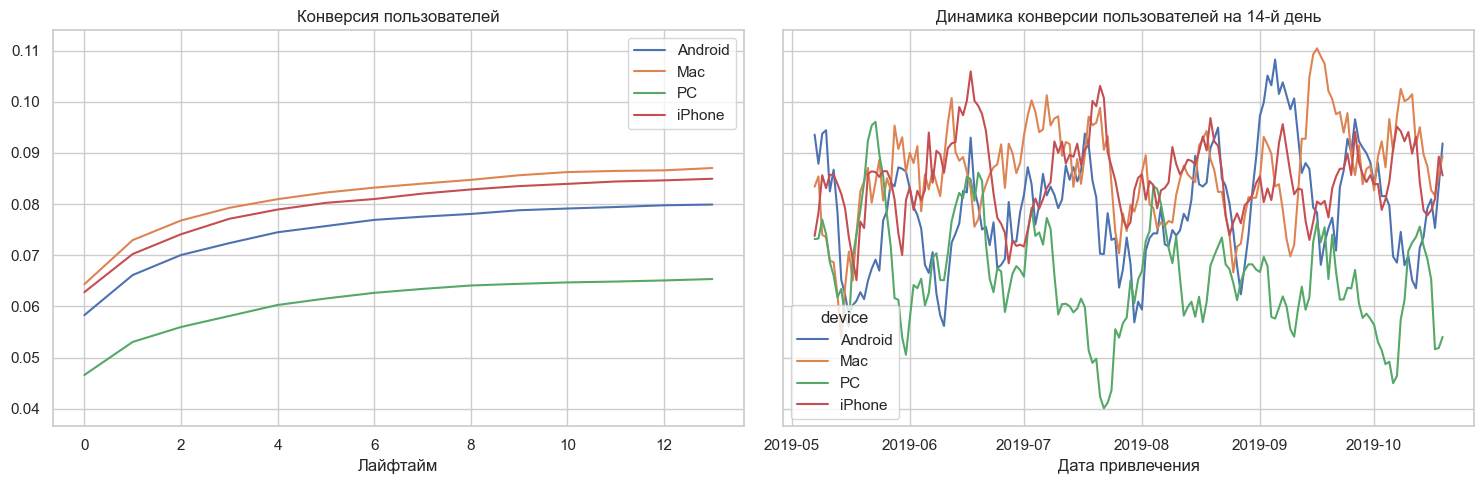

In [75]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = ['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, по всем устройствам пользователи стабильно конвертируются постоянно, однако меньшая конвертация у пользователей PC.


Далее посчитаем и визуализируем удержание пользователей на различных устройствах.


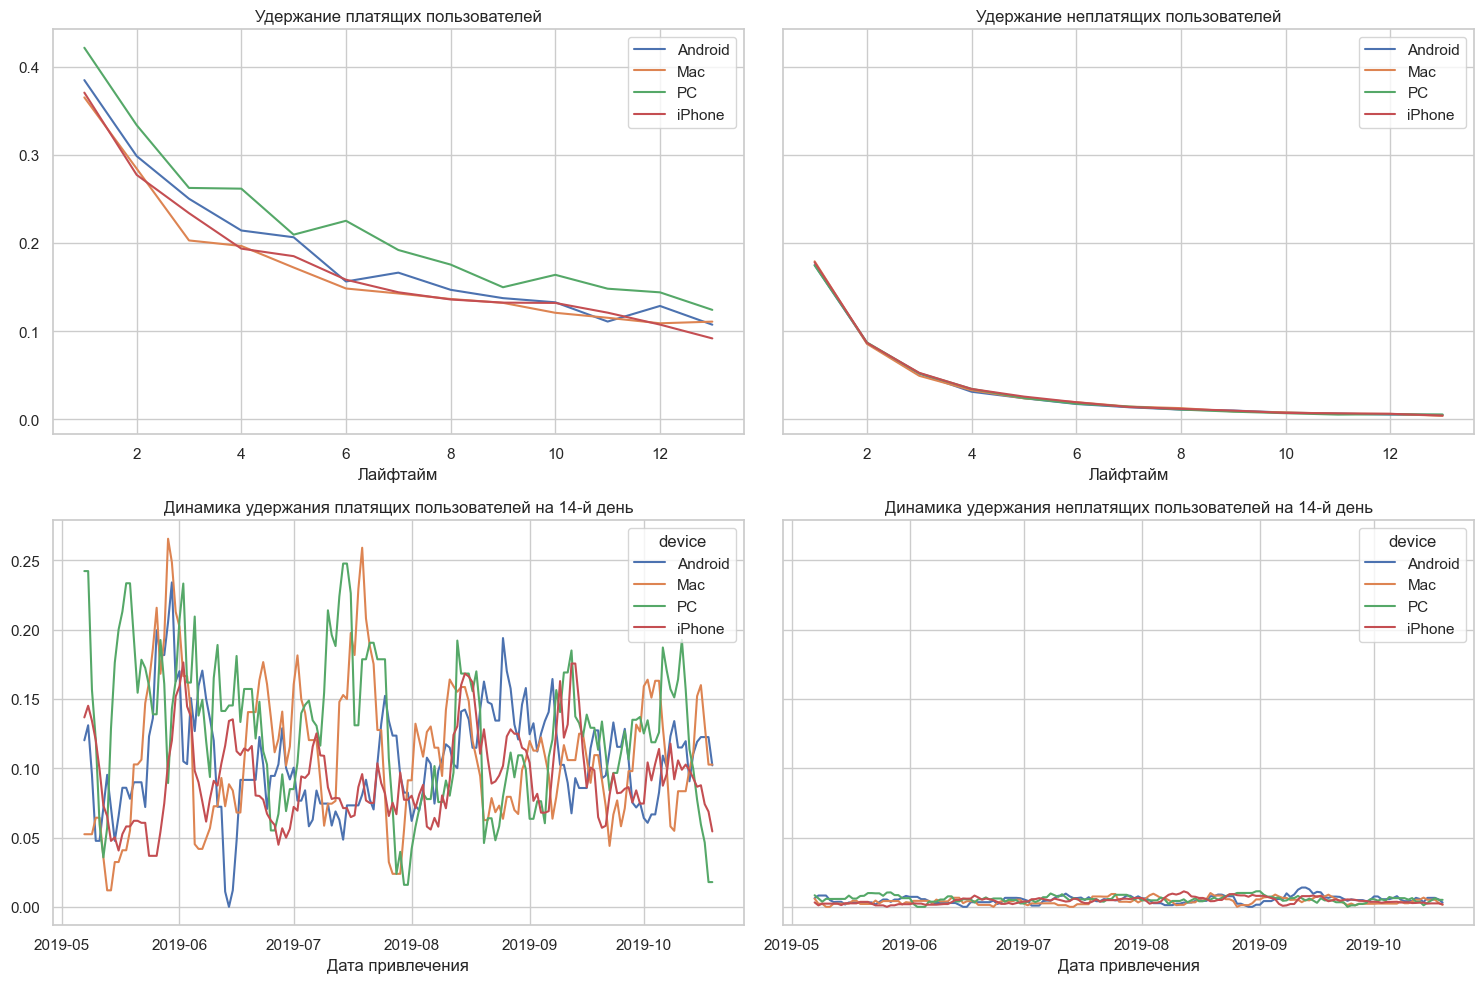

In [76]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = ['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Несмотря на то, что самая низкая конверсия у PC, уровень удержания платящих пользователей у данного девайса немного выше, чем у остальных.

Посчитаем и визуализируем конверсию пользователей в зависимости от страны.

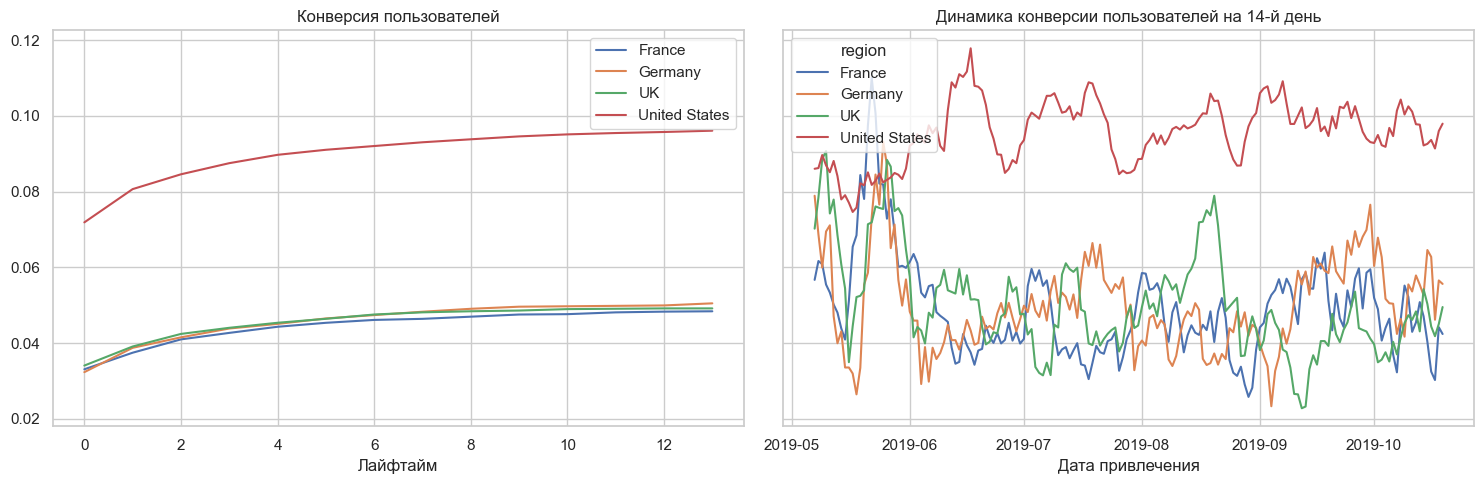

In [77]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = ['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

На графике можно заметить, что лидерство по конвертации пользователей у Соединенных Штатов.

Рассмотрим удержание пользователей по странам.

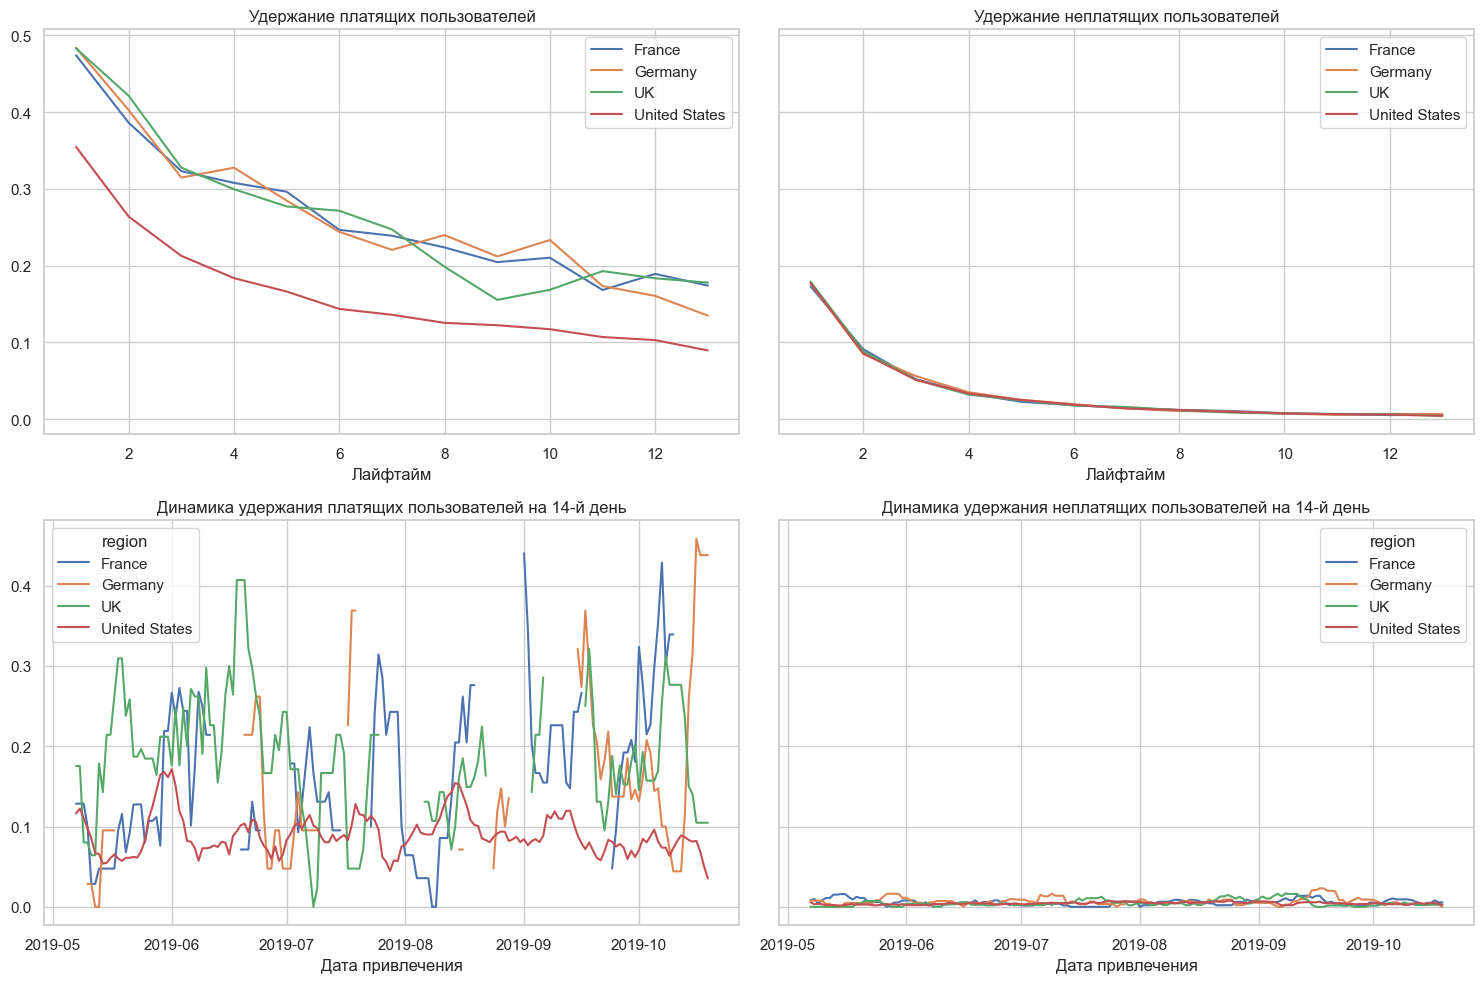

In [78]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = ['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Несмотря на то, что пользователи Соединенных Штатов конвертируются активнее, их  удержание ниже, чем у остальных стран. 

Рассмотрим удержание пользователей по рекламным каналам.

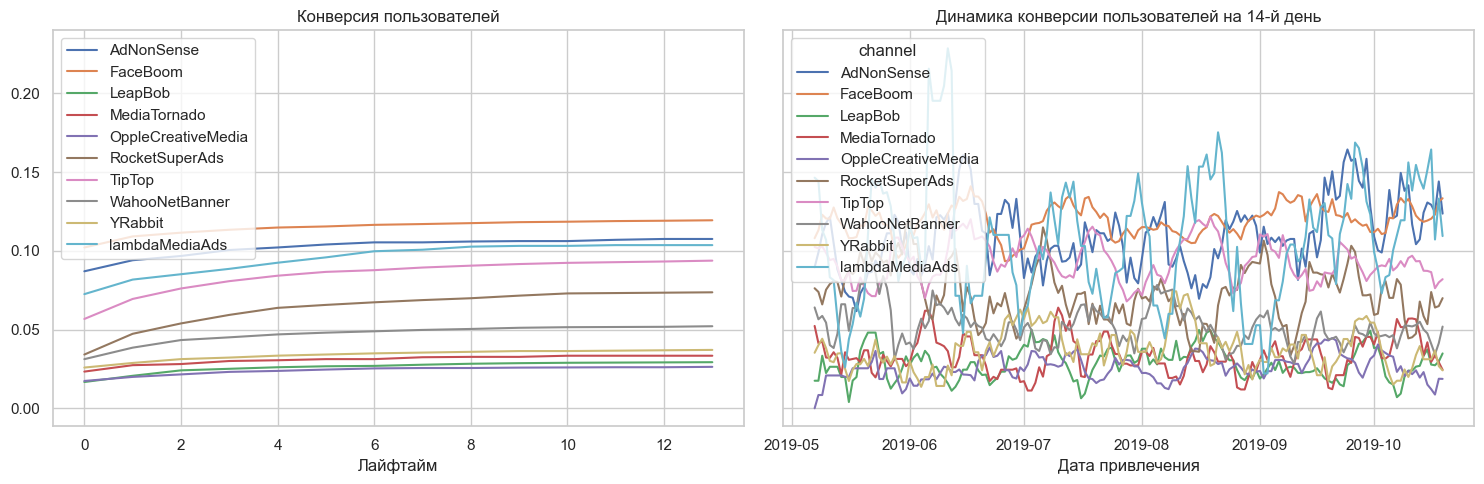

In [79]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = ['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Лидером по конвертации пользователей является канал FaceBoom. Также высокая конверсия у канала AdNonSense, LambdaMediaAds и TipTop.

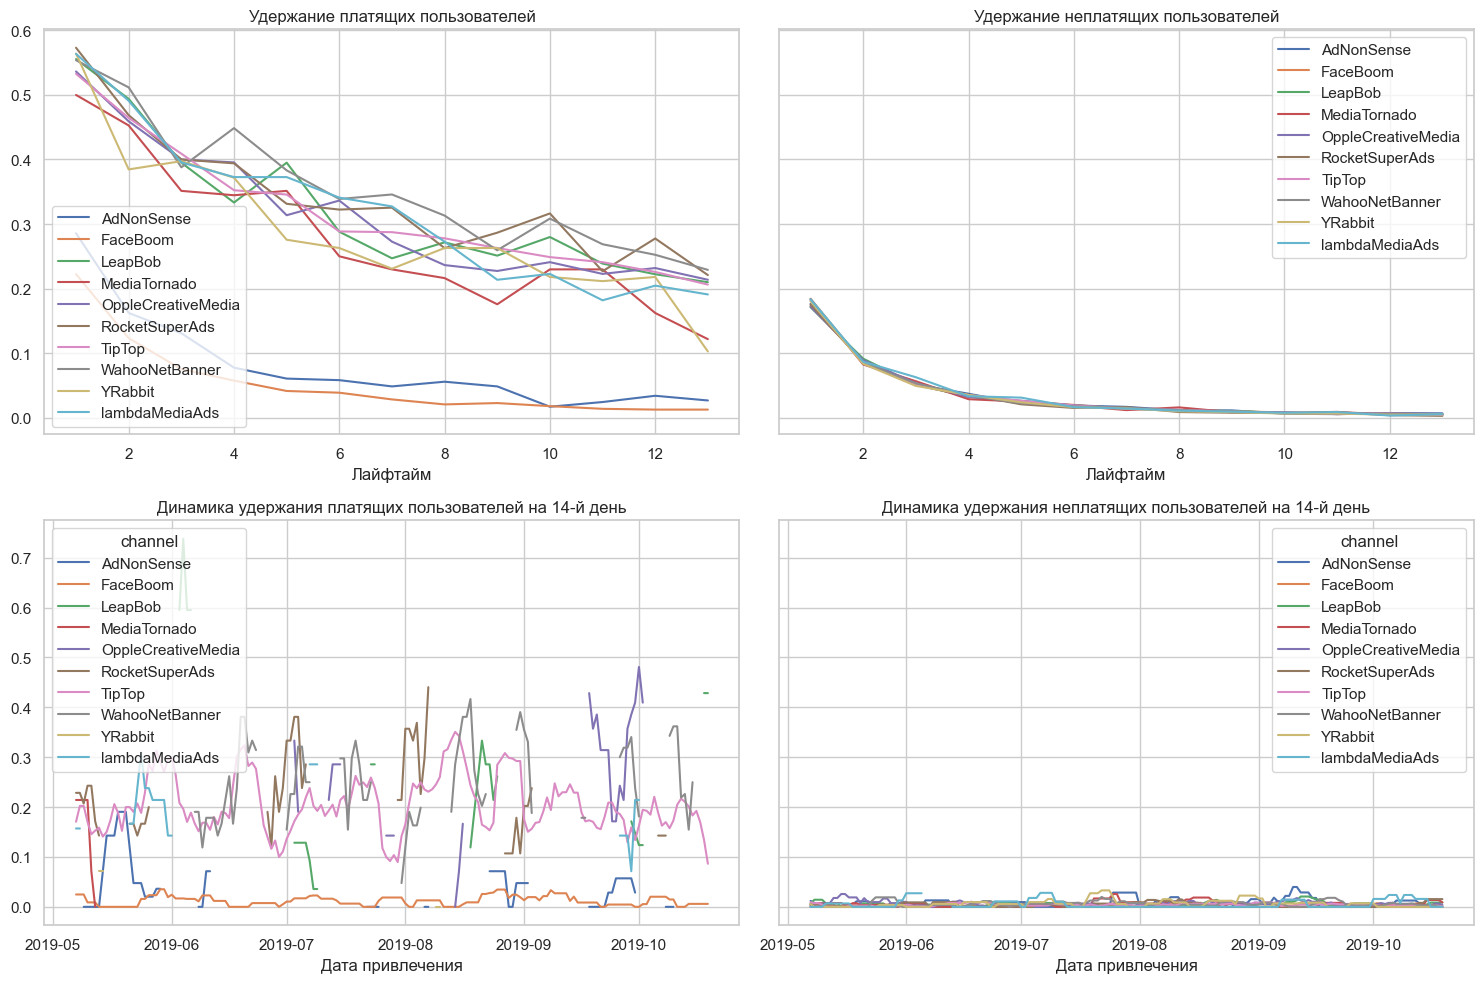

In [80]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = ['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание по наиболее конвертируемым каналам FaceBoom и AdNonSense значительно ниже, чем у остальных.

<a id="advertisement3"></a>
#### Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

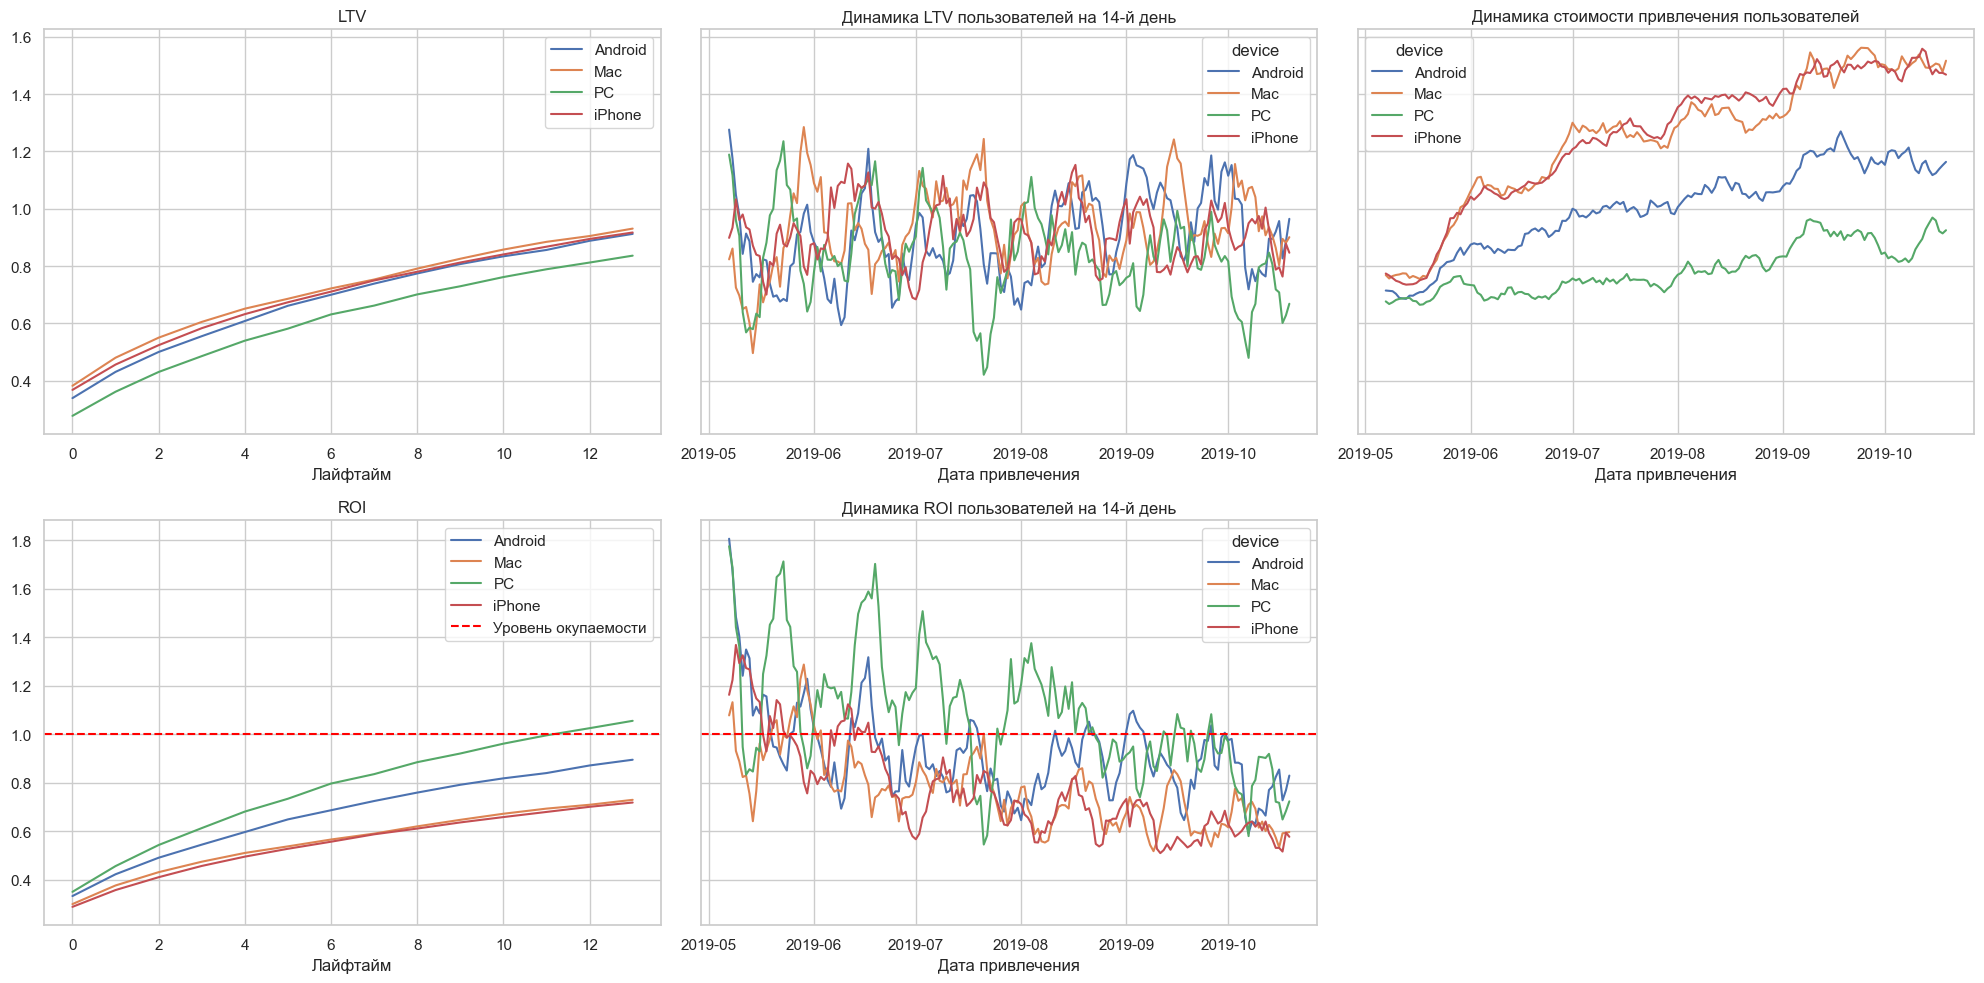

In [81]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days
) 

- Реклама окупается только у пользователей PC. Наименьшая окупаемость у Mac и iPhone.


- CAC в динамике рассматриваемого периода постоянно увеличивается по всем устройствам, однако у PC стоимость привлечения самая низкая, а также ее рост в динамике меньше. Устройства Mac и iPhone являются самыми дорогими по привлечению, а также за рассматриваемый период рост стоимости привлечения увеличился почти в два раза.


- Показатель LTV внутри рассматриваемого периода стабилен по всем устройствам, однако у PC он ниже, чем у других устройств.

<a id="advertisement4"></a>
#### Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

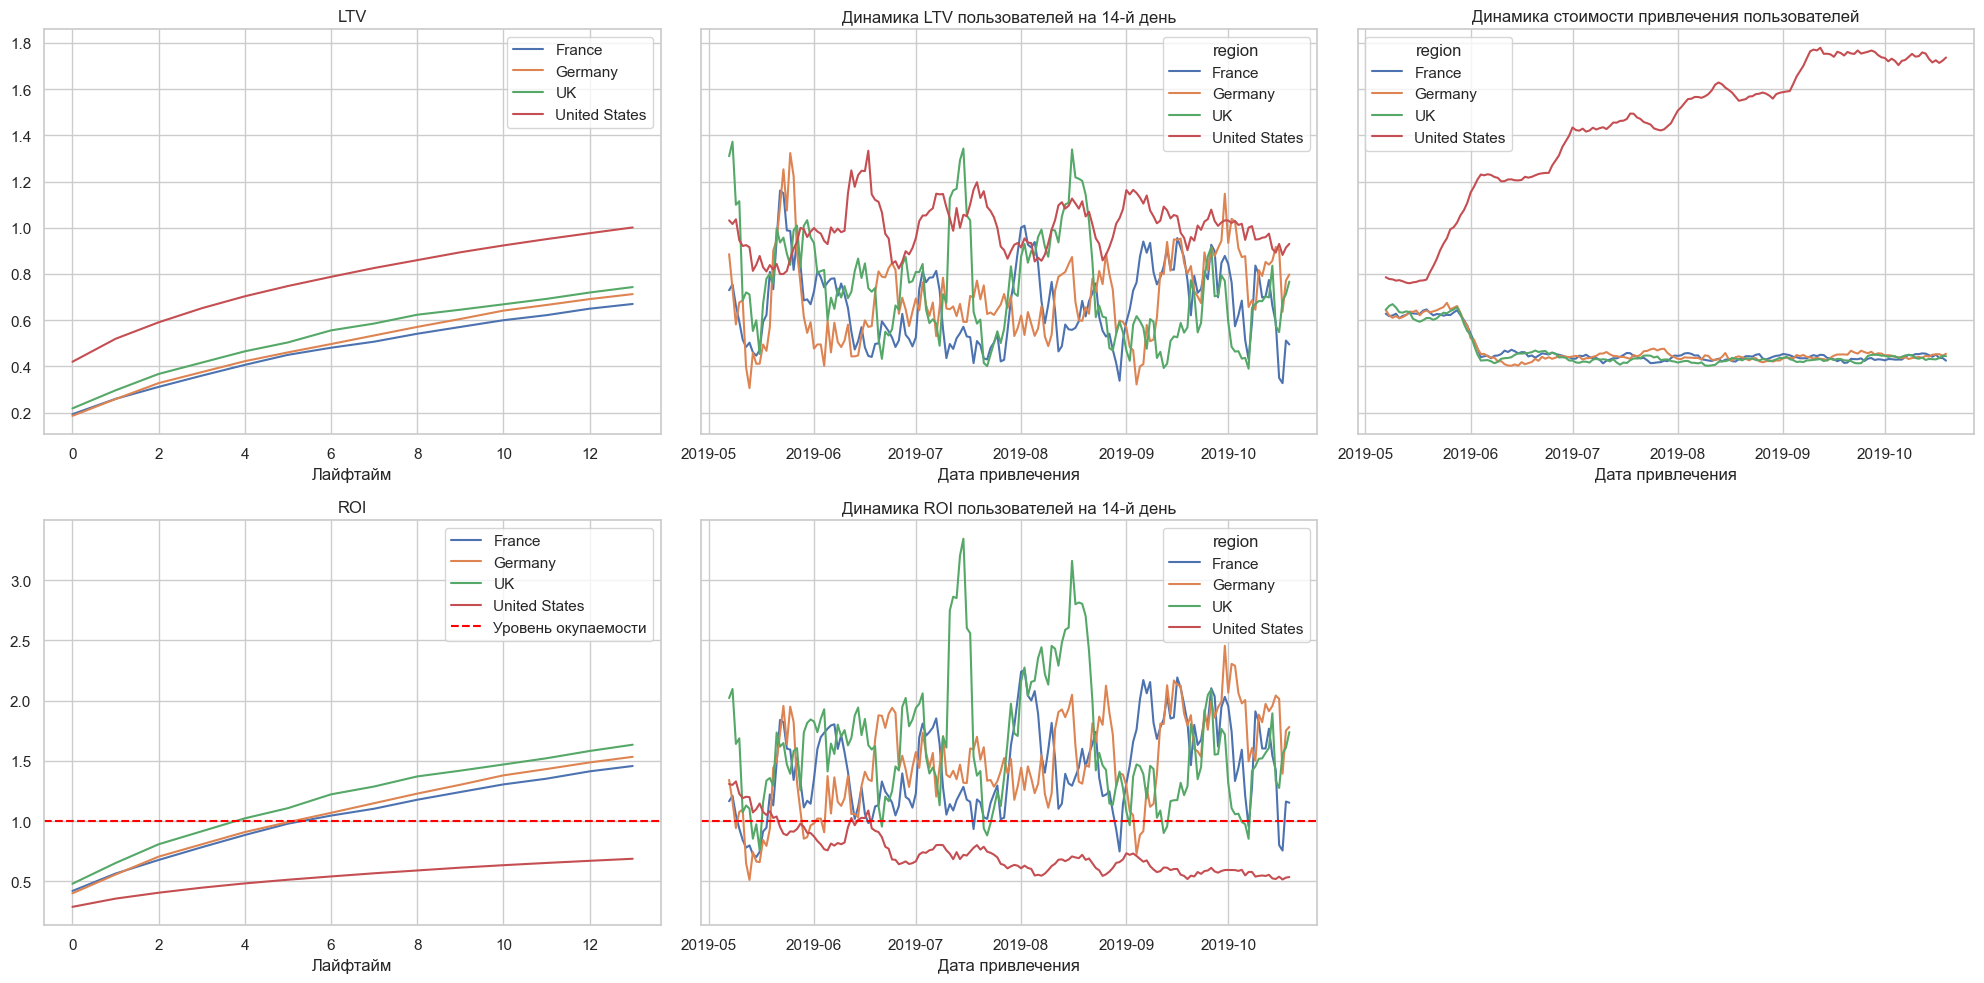

In [82]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['region']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days
)


- Реклама окупается во всех регионах, кроме Соединенных Штатов. 


- CAC в динамике рассматриваемого периода упала по всем странам, кроме Соединенных Штатов, у этой страны, стоимость привлечения, наоборот, увеличилась более чем в 2 раза.


- Показатель LTV внутри рассматриваемого периода стабилен по всем устройствам, однако у Соединенных штатов он выше.

<a id="advertisement5"></a>
#### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

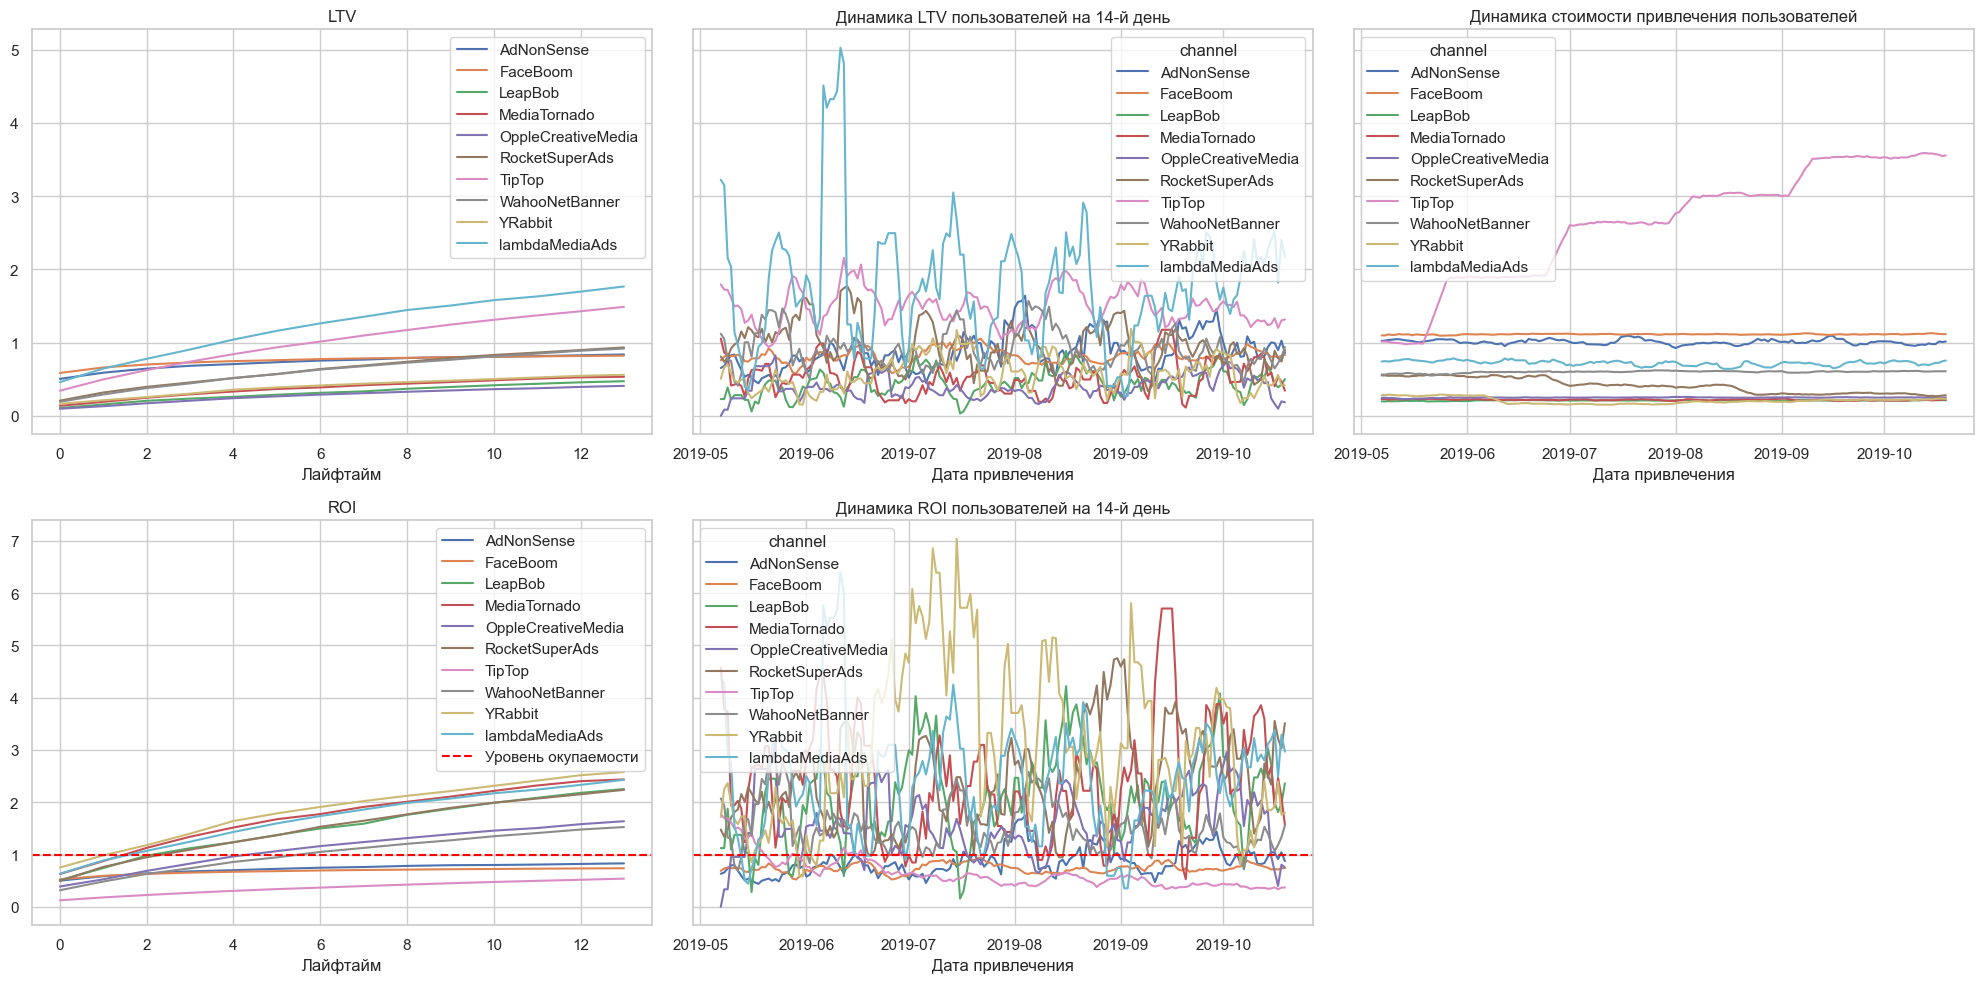

In [83]:

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days
) 

- Реклама отлично окупается по всем каналам, кроме TipTop, FaceBoom и AdNonSense. 


- CAC в динамике рассматриваемого периода стабилен по всем каналам, кроме TipTop, по нему в динамике происходит постоянное увеличение. 


- Показатель LTV внутри рассматриваемого периода стабилен по всем устройствам, однако у LambdaMediaAds он самый высокий.


**Подробнее рассмотрим какие страны, а также устройства охватывают 3 не окупившиеся рекламные каналы (TipTop, FaceBoom и AdNonSense)**

In [84]:
widget1 = widgets.Output()
widget2 = widgets.Output()
widget3 = widgets.Output()
widget4 = widgets.Output()
 
with widget1:
    display(profiles.query('channel == "FaceBoom"').groupby(['region', 'device'])\
            .agg({'user_id': 'nunique'})\
            .rename(columns={'user_id': 'FaceBoom user_id'})\
            .sort_values(by = 'FaceBoom user_id', ascending = False))
with widget2:
    display(profiles.query('channel == "TipTop"').groupby(['region', 'device'])\
            .agg({'user_id': 'nunique'})\
            .rename(columns={'user_id': 'TipTop user_id'})\
            .sort_values(by = 'TipTop user_id', ascending = False))
with widget3:
    display(profiles.query('channel == "AdNonSense"').groupby(['region', 'device'])\
            .agg({'user_id': 'nunique'})\
            .rename(columns={'user_id': 'AdNonSense user_id'})\
            .sort_values(by = ['region', 'AdNonSense user_id'], ascending = False))
 
    
box_layout = Layout(display='flex',
                    flex_flow='row',
                    justify_content='space-around',
                    width='950px'
                   )
hbox = widgets.HBox([widget1, widget2, widget3], layout=box_layout)
hbox

По данным таблиц видно, что рекламные каналы FaceBoom и TipTop направлены на аудиторию Соединенных Штатов. Так как эти рекламные каналы являются наиболее финансируемые и самыми неэффективными, отсюда и, в разбивке по странам, отсутствие окупаемости в Соединенных штатах. Также в данном регионе низкое количество пользователей PC, именно поэтому этот вид устройств единственный окупился. 

Также одним из нерентабильных оекламных каналов оказался AdNonSense. Он, в свою очередь, направлен на привлечение пользователей Европы. В пример к нему также были выведены данные наиболее удачного рекламного канала lambdaMediaAds. AdNonSense имеет хорошую конвертацию пользователей, но слишком низкое их удержание.

**Ответы на вопросы.**

- ***Окупается ли реклама, направленная на привлечение пользователей в целом?***

Рекламная стратегия компании малоэффективна, в целом затраты на рекламу не окупаются.

- ***Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?***

Рассматривая окупаемость по отдельным признакам пользователей, необходимо отметить: 
- среди устройств, реклама окупается только по одному устройству - PC, 

- лидер по затратам на рекламу - Соединенные Штаты (реклама в этой стране не окупается),

- не окупается реклама по 3-м каналам(TipTop, FaceBoom и AdNonSense).

- ***Чем могут быть вызваны проблемы окупаемости?***

Затраты на рекламную компанию TipTop не окупились, в этот канал привлечения было вложено огромное количество финансовых ресурсов и стоимость привлечения пользователей постоянно росла.

Также среди рекламных каналов необходимо отметить отсутствие окупаемости у FaceBoom и AdNonSense. Стоимость привлечения по ним выше, чем у остальных. Хоть пользователи активно конвертируются, но удержание по ним крайне низкое.

<a id="rec"></a> 
### Выводы и рекомендации по исследованию.

<a id="rec1"></a> 
#### Причины неэффективности привлечения пользователей.

**На основании проведенного исследования, можно выделить следующие причины неэффективности привлечения пользователей:**

В рекламные каналы источников FaceBoom и TipTop было вложено слишком много денежных средств, в итоге затраты не окупились. Основной аудиторией привлечения были пользователи Соединенных Штатов. Также нерентабельным оказался канал для привлечения пользователей Европы - AdNonSense. 

**Рассматривая каждый канал по отдельности:** 

- FaceBoom являлся одним из самыми дорогостоящими источников на начало исследуемого периода. Пропорционально уровню затрат на канал, он не имеет высоких показателей LTV и ROI. Положительным моментом является хорошая конверсия пользователей, но динамика удержания у FaceBoom худшая из всех источников. 


- Канал TipTop имеет хорошие показатели конверсии и удержания, а также ROI. Однако с середины мая распределение между каналами стало непропорциональным и большую часть рекламного бюджета была вложена в каналы в TipTop и FaceBoom. Поэтому в динамике стоимость привлечения пользователей TipTop только увеличивалась и окупаемости рекламы не произошло.


- Рекламный источник AdNonSense по полученным показателям идет вровень с каналом FaceBoom, он имеет довольно высокую стоимость привлечения пользователей, среднюю прибыль, полученную от одного клиента за всё время сотрудничества с ним, а также крайне низкий уровень удержания. Главным отличием между источниками AdNonSense и FaceBoom является то, что AdNonSense получил крайне низкое финансирование из общего рекламного бюджета.

<a id="rec2"></a> 
#### Рекомендации для отдела маркетинга.

**Основываясь на полученных результатах, за рассматриваемый период исследования, главной стратегией рекламной политики приложения Procrastinate Pro+ было привлечение новых пользователей из Соединенных Штатов. Для её реализации огромная часть бюджета была потрачена на каналы FaceBoom и TipTop, которые в итоге не окупились.**

- В отличие  от FaceBoom, TipTop отличился хорошим удержанием пользователей. Стоит подробнее рассмотреть, почему канал FaceBoom совершенно не удерживает пользователей, возможно имеются какие-то технические проблемы. Искать причины крайне низкого удержания необходимо и по каналу AdNonSense. 


- Рекламный источник TipTop имеет и хорошую конверсию, удержание, среднюю прибыль, полученную от одного клиента, однако не окупился он из-за слишком больших затрат, а также постоянное их увеличение в столь низкий срок. Необходимо более грамотно осуществлять финансирование данного источника. 


**На основании проведенного исследования, можно выделить 3 окупившихся рекламных канала с самыми высокими показателями конверсии, удержания и средней прибылью, полученной от одного клиента(CAC) - RocketSuperAds, WahooNetBanner, lambdaMediaAds.**

При отсутствии постоянных финансовых вложений, а в динамики и их сокращение, lambdaMediaAds и RocketSuperAds имеют отличные показатели. Канал WahooNetBanner уступает предыдущим только по окупаемости, вероятнее всего, по причине постоянного увеличения рекламных затрат. Канал имеет отличную перспективу при более грамотном управлении расходами на рекламу.